In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [4]:
df_crypto = pd.read_csv('crypto_data.csv')
df_crypto.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [5]:
is_true_df = df_crypto[df_crypto['IsTrading'] == True]
is_true_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [6]:
is_true_no_trading_info = is_true_df.drop('IsTrading', axis =1)

In [7]:
is_true_no_na = is_true_no_trading_info.dropna()

In [8]:
has_mined = is_true_no_na[is_true_no_na['TotalCoinsMined'] > 0]

In [10]:
no_coin_name = has_mined.drop('CoinName', axis = 1)

In [11]:
with_dummies = pd.get_dummies(no_coin_name)
with_dummies

,TotalCoinsMined,Unnamed: 0_1337,Unnamed: 0_1CR,Unnamed: 0_404,Unnamed: 0_42,Unnamed: 0_8BIT,Unnamed: 0_AAC,Unnamed: 0_ABJ,Unnamed: 0_ABS,Unnamed: 0_ABY,...,TotalCoinSupply_91388946,TotalCoinSupply_92000000000,TotalCoinSupply_9354000,TotalCoinSupply_9507271,TotalCoinSupply_9736000,TotalCoinSupply_98000000,TotalCoinSupply_98100000000,TotalCoinSupply_990000000000,TotalCoinSupply_999481516,TotalCoinSupply_9999999
0,4.199995e+01,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.055185e+09,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2.927942e+10,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1.792718e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
scaled_final_df = StandardScaler().fit_transform(with_dummies)

In [13]:
pca = PCA(n_components=0.9)
crypto_pca = pca.fit_transform(scaled_final_df)
len(crypto_pca)

532

In [14]:
df_crypto_pca = pd.DataFrame(data = crypto_pca)
df_crypto_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,431,432,433,434,435,436,437,438,439,440
0,-0.306478,-0.134248,1.654190e-15,-4.534599e-16,0.034075,1.765116,-0.400153,0.105507,-2.213661,-0.508047,...,-0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00
1,-0.286779,-0.135378,3.799275e-15,-2.291255e-15,0.029073,1.763942,-0.400047,0.105766,-2.216127,-0.508439,...,2.281557e-15,-8.512348e-15,1.242153e-15,1.159875e-14,-1.108326e-14,3.509729e-15,-9.556372e-15,2.543677e-14,-1.575148e-14,2.480151e-16
2,0.361159,-0.003304,7.580443e-15,-1.194508e-14,-0.094542,2.909136,-0.481620,-0.442389,-1.633107,0.000252,...,-7.607318e-15,-6.573664e-16,-1.152000e-15,4.170643e-15,-5.898306e-15,4.059253e-15,5.437606e-15,2.895020e-15,1.081236e-14,-1.583519e-15
3,-0.287881,-0.256431,-3.628353e-16,1.243855e-14,0.001154,-1.825765,0.183748,-0.142160,0.426857,0.250633,...,-3.796208e-01,1.289796e+00,-5.142219e-01,-6.337754e-01,-1.727361e+00,-1.217608e+00,1.243825e+00,-4.260422e-01,-2.171871e+00,-6.400405e-01
4,-0.136884,-0.256819,9.321190e-16,-4.180534e-16,-0.049065,-1.761258,0.160765,-0.086250,0.497740,0.093311,...,-8.129738e-01,-1.257010e+00,3.266447e-01,1.618993e+00,-5.065869e-01,9.474306e-01,-2.242751e+00,6.863367e-01,-1.330246e+00,3.630309e-01


In [15]:
tsne = TSNE(learning_rate=35)
tsne_features = tsne.fit_transform(df_crypto_pca)

<function matplotlib.pyplot.show(close=None, block=None)>

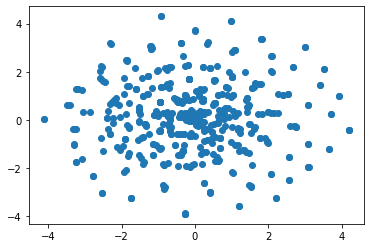

In [16]:
df_crypto_pca['x'] = tsne_features[:,0]
df_crypto_pca['y'] = tsne_features[:,1]
plt.scatter(df_crypto_pca['x'], df_crypto_pca['y'])
plt.show

C:\Users\codyc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


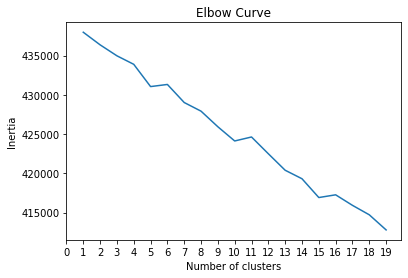

In [17]:
inertia = []
k = list(range(1,20))

for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_crypto_pca)
    inertia.append(km.inertia_)

elbow_data = {'k': k, 'inertia': inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(20)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()